# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [11]:
def apply_svd_custom(X_train, X_test, n_components):
    #raise NotImplementedError("Your implementation here...")

    """
    ** What we are doing **
    SVD: A = U Sigma V^T, where
    A: The original mxn matrix
    U: mxm matrix [eigenvectors of AAT]
    Sigma: diagonal matrix of singular values of A
    VT: nxn matrix [eigenvectors of ATA]

    ** Inputs **
    X_train: Array of training data
    X_test: Array of testing data
    n_components: Number of components for compression (keep top n, toss the rest)

    ** Outputs **
    X_train_svd: Compressed training data
    X_test_svd: Compressed testing data
    all_eigenvectors: Array containing all eigenvectors
    """

    # Get the top eigen vectors:
    top_eigenvectors, all_eigenvectors = compute_top_eigen(X_train, n_components)

    # Apply SVD to both training and test sets
    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)

    return X_train_svd, X_test_svd, all_eigenvectors


def compute_top_eigen(X, n_components):
    """
    ** Inputs **
    X[array]: mxn matrix
    n_components[int]: number of top eigen values to preserve

    ** Outputs **
    top_eigenvectors[array]: Top n eignevectors of X_train
    all_eigenvectos[array]: All eigenvectors, used to plotting the SV in part 5
       __                   __              __             __
    m |   n columns initial   |          m |   n com. col    |
      |                       |            |                 |
    r |                       |   --->   r |                 |
    o |                       |          o |                 |
    w |                       |          w |                 |
    s |__                   __|          s |__             __|

    Note: we compute the top eigenvectors in the test data, and will use them for the svd compression in the main funciton

    """

    # Compute covariance matrix VT = ATA:
    VT = np.dot(X.T, X)

    # Compute eigenvalues and eigenvectors of VT:
    eigenvalues, eigenvectors = np.linalg.eigh(VT)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors (ie the top principal components)
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    return top_eigenvectors, sorted_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [12]:
svd_components = [10, 20, 40, 80, 160]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, EV = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Save the results for data visualization!
    # Array of the following format: [# of components, accuracy, time]
    results.append([n_components, accuracy, training_time])
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.3960 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.6591 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.9024, Training time: 9.8454 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.9166, Training time: 42.4986 seconds
Applying custom SVD with 160 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 160, Accuracy: 0.9193, Training time: 102.5481 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


Components: [10, 20, 40, 80, 160]
Accuracies: [0.802, 0.8779285714285714, 0.9024285714285715, 0.9165714285714286, 0.9192857142857143]
Times: [1.3960182666778564, 1.6590759754180908, 9.845407247543335, 42.49864315986633, 102.54806733131409]


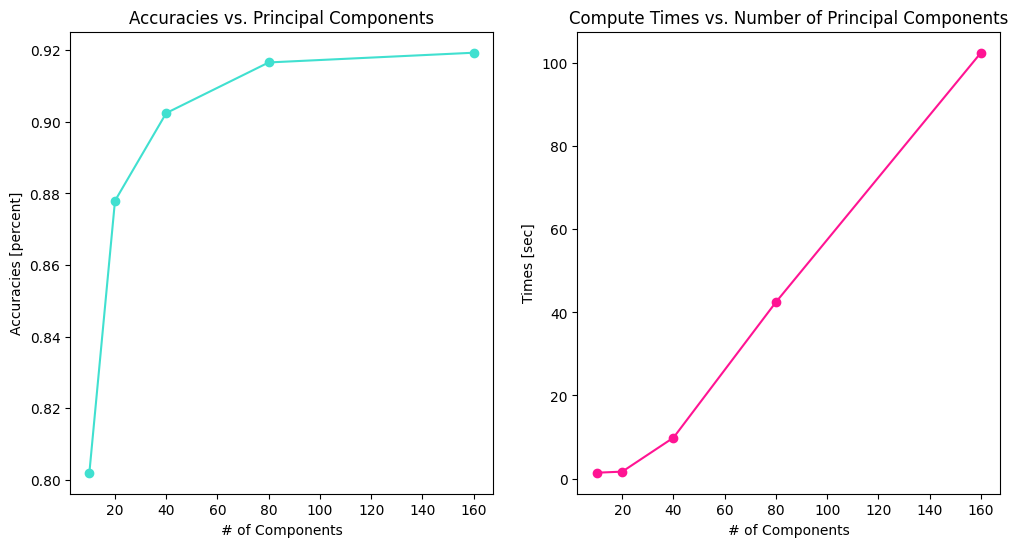

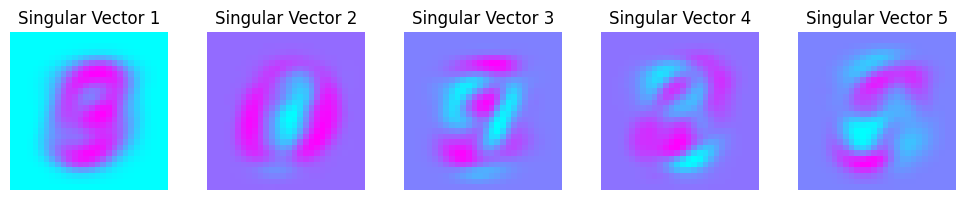

In [23]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Isolating the data:
components = [entry[0] for entry in results]
accuracies = [entry[1] for entry in results]
times = [entry[2] for entry in results]

print("Components:", components)
print("Accuracies:", accuracies)
print("Times:", times)


# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracies vs. components
ax1.plot(components, accuracies, marker='o', linestyle='-', color='turquoise')
ax1.set_title('Accuracies vs. Principal Components')
ax1.set_xlabel('# of Components')
ax1.set_ylabel('Accuracies [percent]')

# Plot times vs. components
ax2.plot(components, times, marker='o', linestyle='-', color='deeppink')
ax2.set_title('Compute Times vs. Number of Principal Components')
ax2.set_xlabel('# of Components')
ax2.set_ylabel('Times [sec]')

# Plotting the top 5 singular values:
top_5_SV = EV[:, :5]
plt.figure(figsize=(10, 2))
for i in range(5):
    image_i = top_5_SV[:, i].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_i, cmap='cool')
    plt.title(f'Singular Vector {i + 1}')
    plt.axis('off')



# Display the plots
plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

For the sake of runtime, we only went up to 160 components out of the possible 784. As we can see from the data, while compute time seems to increase linearly as a function of component number, the regression accuarcy on the compressed images appears to be logarithmic, with sharp increases for minimal additions at low component values, and marginal gains for the same differential at higher values. From these trends, we can imagine that if we continued to double the components, we would vastly increase the runtime to several minutes while barely getting the acuracy higher than a 92%. We can also see from the data that when we have less than 20 components, our accuracy will start to stuggle. This implies that we are loosing valueble data during the compression, and thus the cost-benefit analysis is in favor of adding more components. Depending on the max accuracy score for the 784components, I could see the optimal number of componenets being between 80-200.